# Programming with Python  MBA 441B

# CIA 3

## Submitted To : Prof. Kannika 

## Submitted By: M Lalith Madhav (1928617)

## Data: Bank Marketing Data 


[link: Bank Marketing Data Set from Kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)

## Business Understanding

Banking industry is one of the most important sectors of social economy. The Indian banking system consists of 20 public sector banks, 22 private sector banks, 44 foreign banks, 44 regional rural banks, 1,542 urban cooperative banks and 94,384 rural cooperatives. Banking sector provide various services for clients which can be broadly classified into 4 categories: Payment services, Financial Intermediary, Financial Services and Ancillary Services.

Deposits constitute to one of the most fundamental and traditional operations of a bank and are the primary source of bank financing. There are many types of deposit accounts under the financial intermediary service of a bank, few of the major types are savings account, term deposit account, current account. The focus of this study is on term deposit accounts as they provide banking sector with the most stable source of credit and profit.

### Data Understanding

The dataset consists of 41,118 entries of details pertaining to a retail bank marketing
call. The dataset has 21 columns or variables.
The data variables can be categorized into 3 different categories:

1. Bank Client Data:     
![Capture.PNG](attachment:Capture.PNG "Bank Client Data") 
2. Contact or Campaign Data:   
![Capture1.PNG](attachment:Capture1.PNG "Contact Data")
3. Social and Economic Factors:  
![Capture2.PNG](attachment:Capture2.PNG "Socio Economic Indicators")
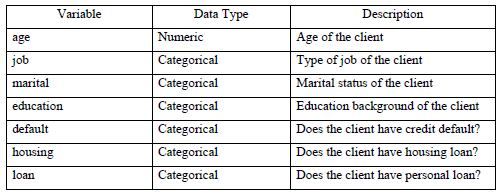
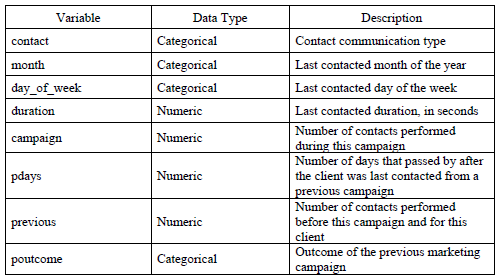
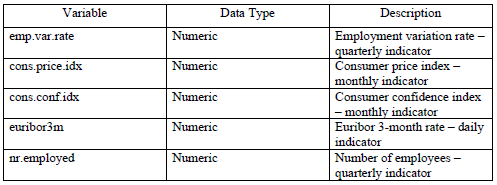

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.


The objective of this project is to perform Exploratory Analysis on the data using Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Mean Age is aproximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old.)

Based on the data information it would be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. 


The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

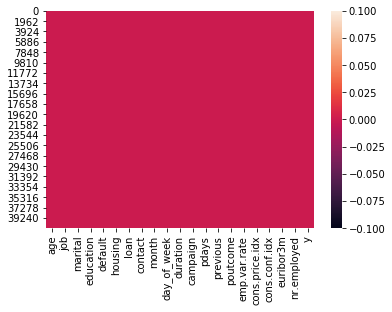

In [6]:
sns.heatmap(df.isnull())

There are no missing values. If there were missing values we will have to fill them with the median, mean or mode.

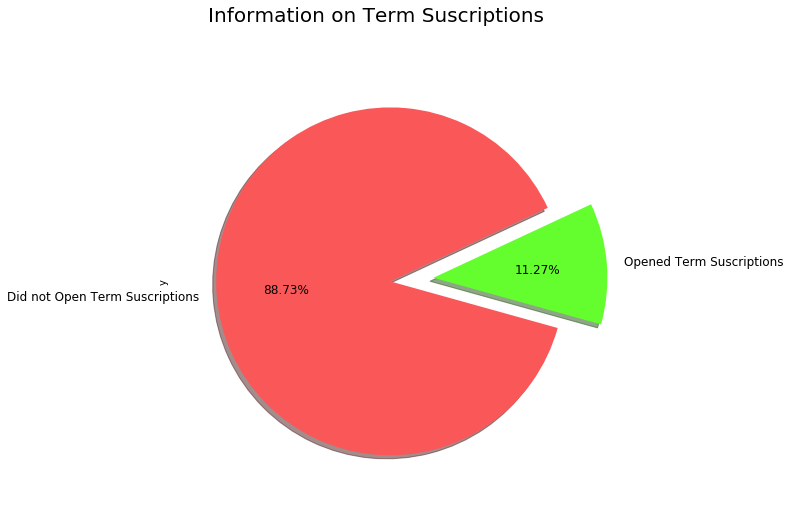

In [7]:
colors = ["#FA5858", "#64FE2E"]
labels =["Did not Open Term Suscriptions", "Opened Term Suscriptions"]

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25, figsize=(16,8))




In [8]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [9]:
for feature in categorical_features:
    print('In the feature {} there are {} number of categories'.format(feature,len(df[feature].unique())))

In the feature job there are 12 number of categories
In the feature marital there are 4 number of categories
In the feature education there are 8 number of categories
In the feature default there are 3 number of categories
In the feature housing there are 3 number of categories
In the feature loan there are 3 number of categories
In the feature contact there are 2 number of categories
In the feature month there are 10 number of categories
In the feature day_of_week there are 5 number of categories
In the feature poutcome there are 3 number of categories


### Categorical Columns Exploration

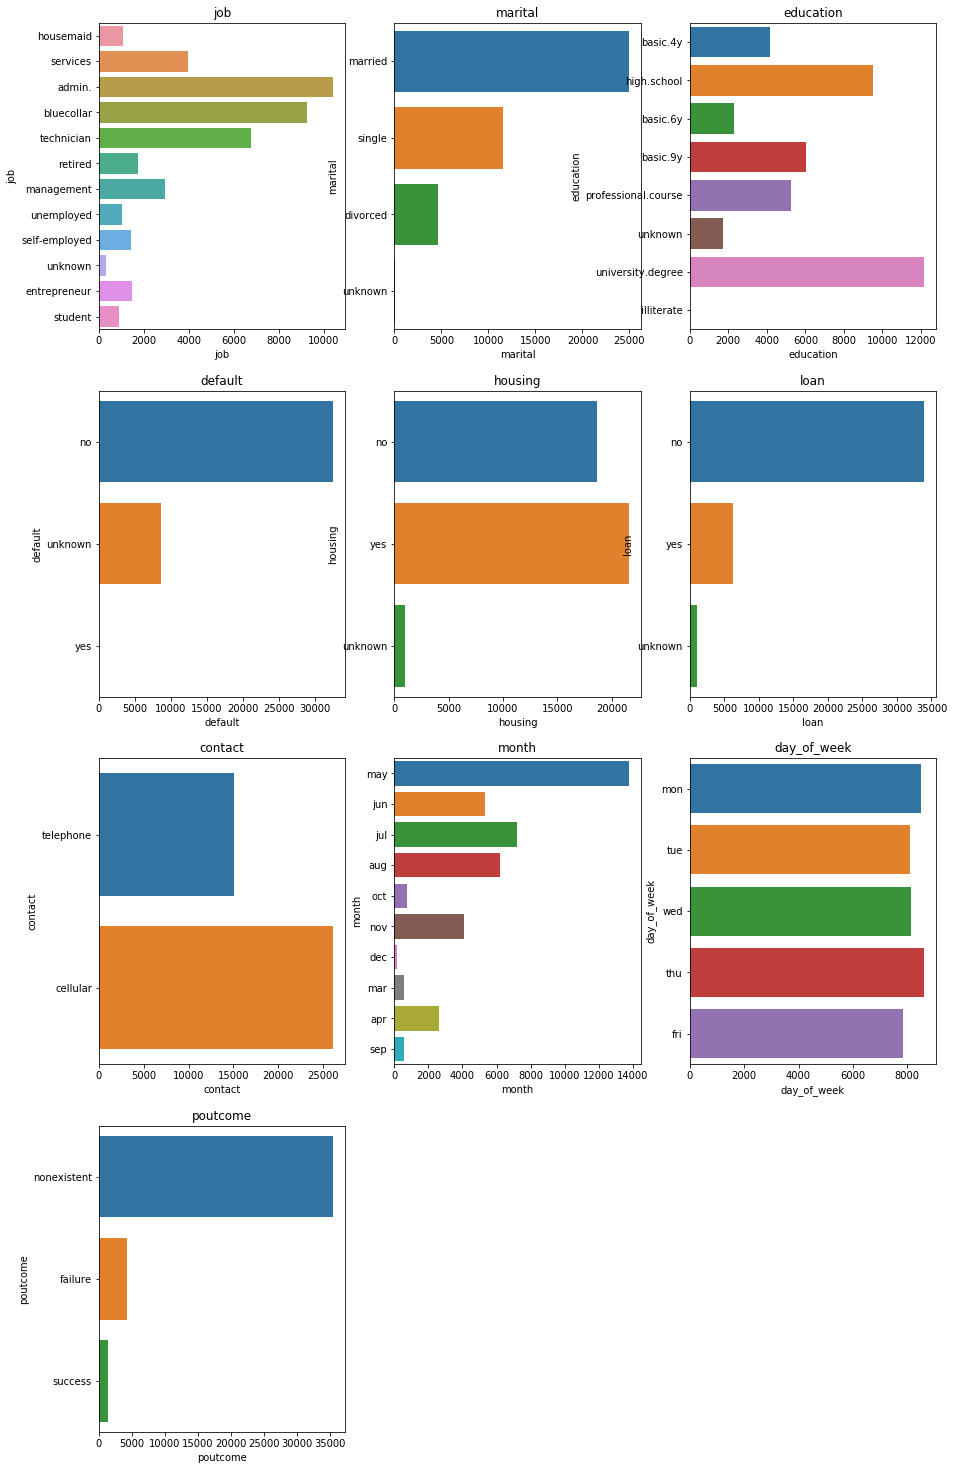

In [10]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

1. Client with job type as admin and bluecollar are high in given dataset and housemaid are very less  
2. Client who married are high in records in given dataset and divorced are less  
3. Client whoes education background is University Degree are in high numbers in given dataset   
4. Defualt feature seems to not play important role as it has value of no at high ratio to value yes which can drop  
5. Data in month of may is high and less in dec, there was no contact at all in the months of January and February.  
6. The martial status of the customer does not play a major role as most categories have a similar conversion rate.
7. Based on the exploratory data analysis we can see that there is a positive correlation between the number of years of education and the customer conversion rate for bank marketing campaign of a term deposit.
8. There is no significant relation between the dependent variable y and the variable housing, loan so they can be reamoved.
9. Based on the EDA we can see that the conversion rate of cellular respondents was 14.7% whereas that for telephone respondents was only 5.2%.
10. Thursdays has the highest conversion rate of 12.1% and Mondays has the least with a rate of 10%.

 ### Relationship between Categorical Variables and Label

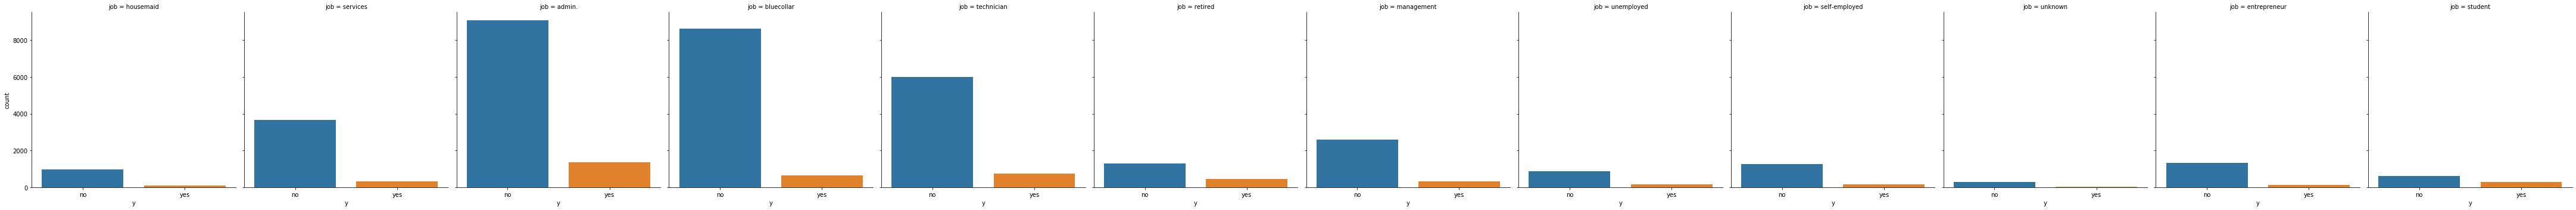

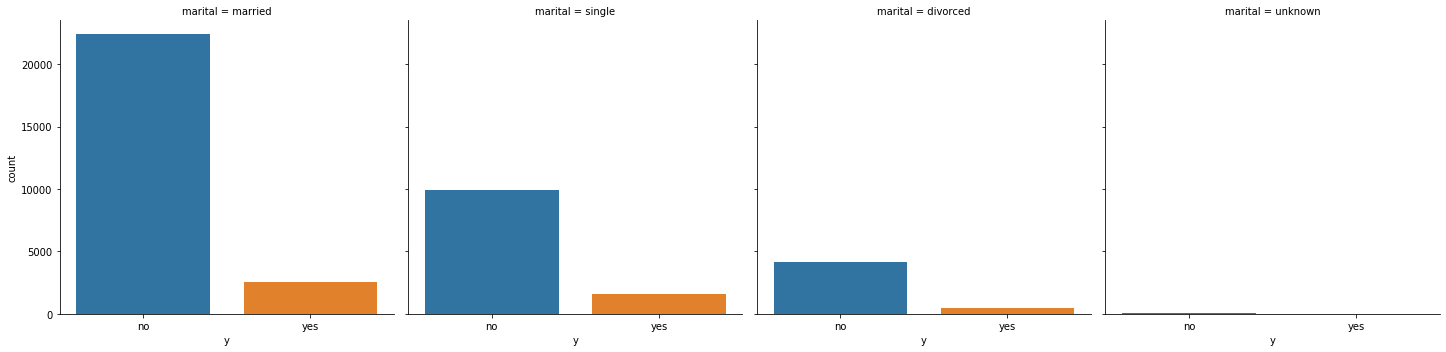

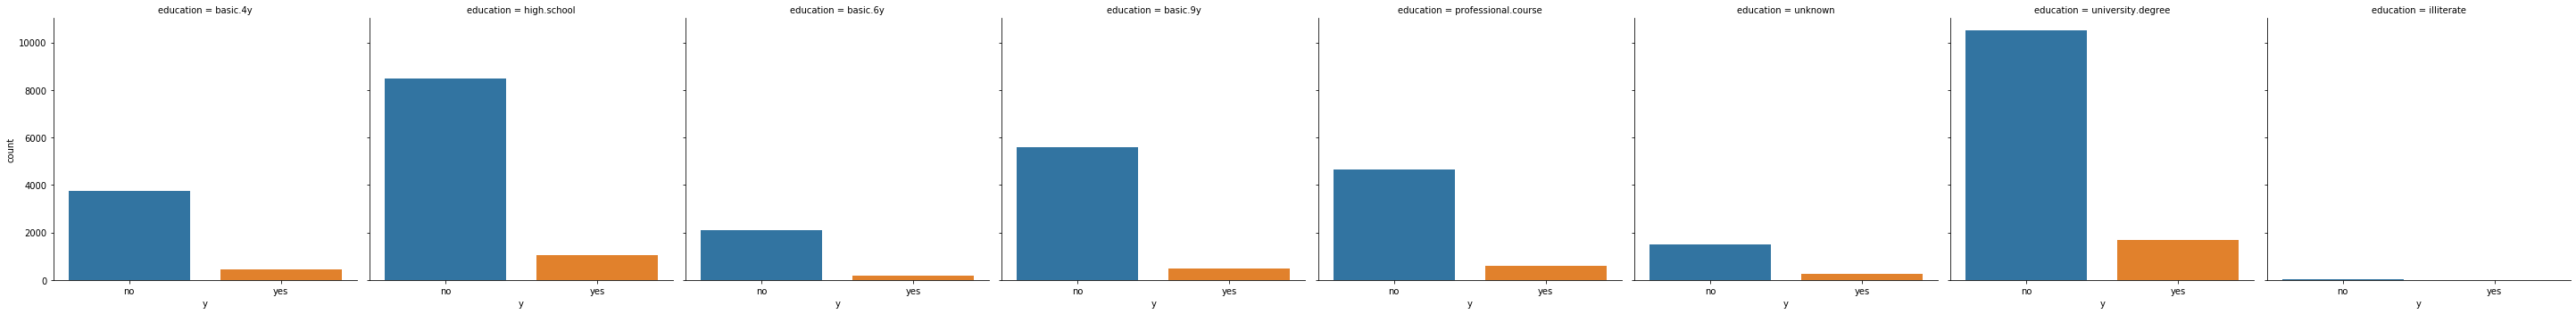

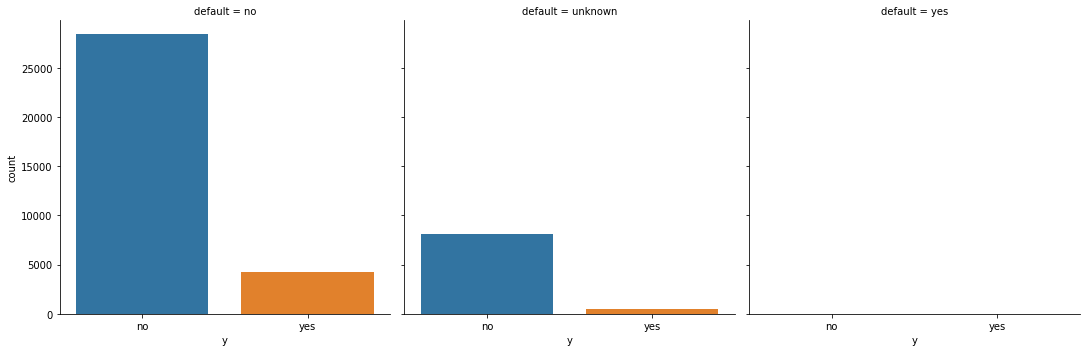

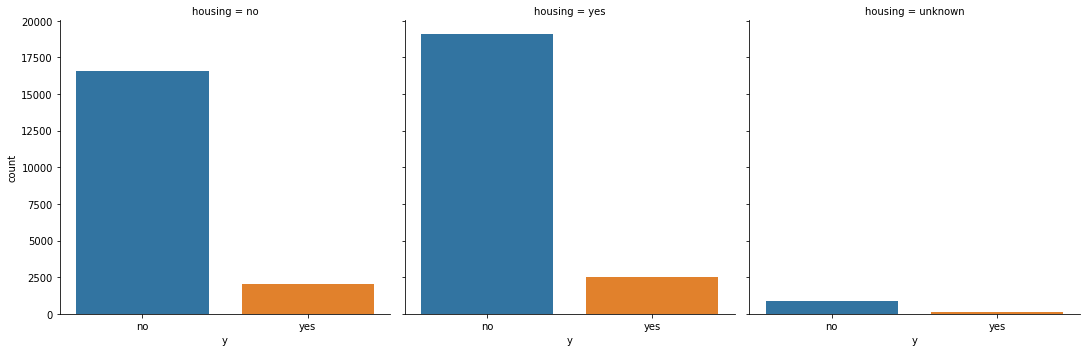

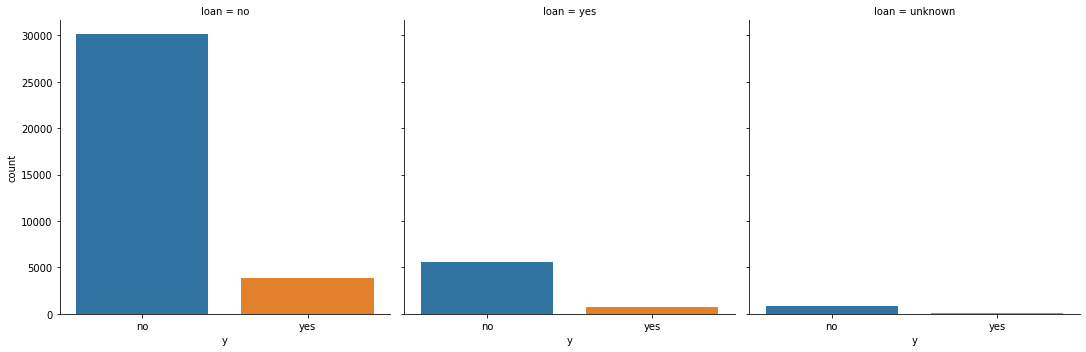

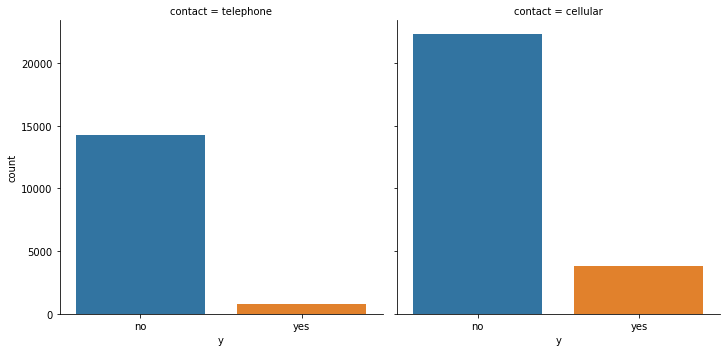

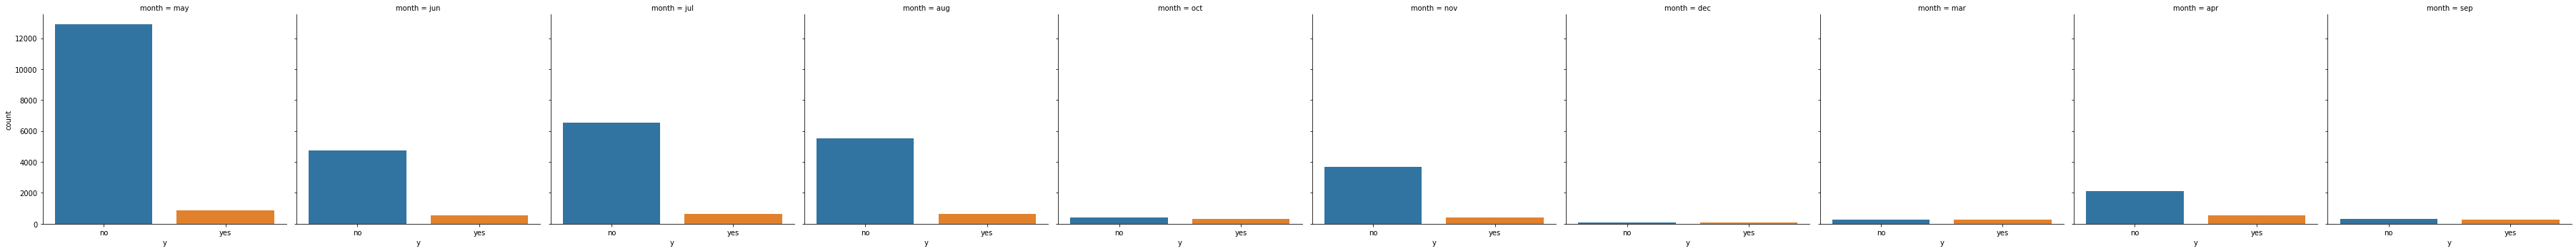

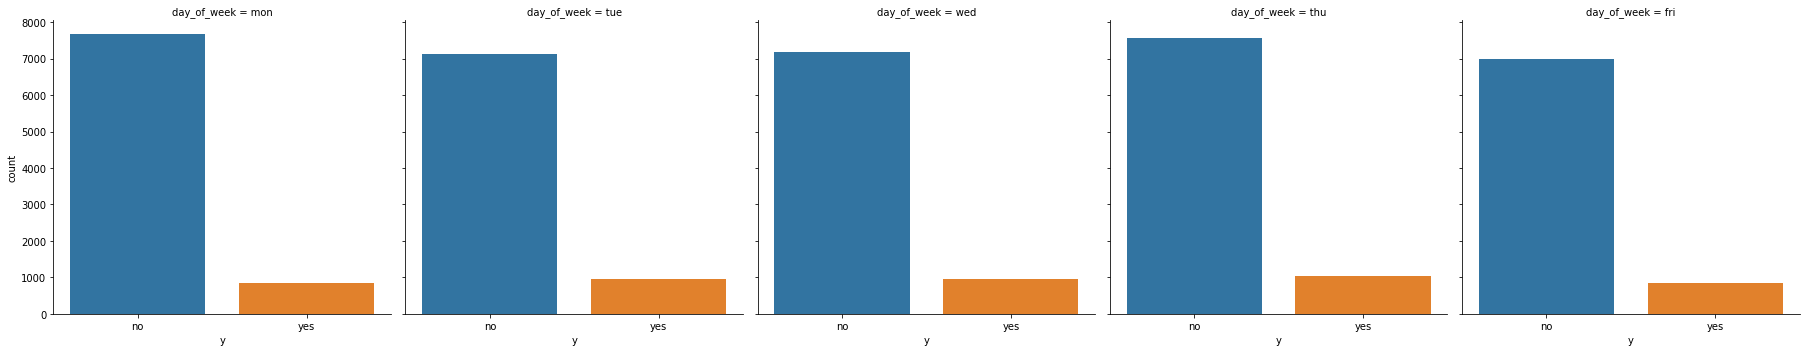

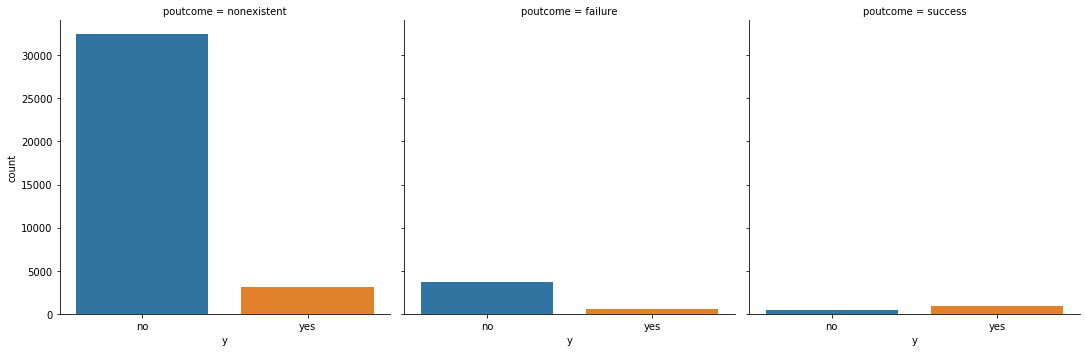

In [11]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df )
plt.show()

1. Retired client has high interest on deposit
2. Client who has housing loan seems to be not interested much on deposit
3. If pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
4. In month of March, September, October and December, client show high interest to deposit
5. In month of may, records are high but client interst ratio is very less

### Numerical Columns Exploration

In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [13]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


### Find Continous NumericalVariables

In [14]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


### Distrbution of Continious Variables

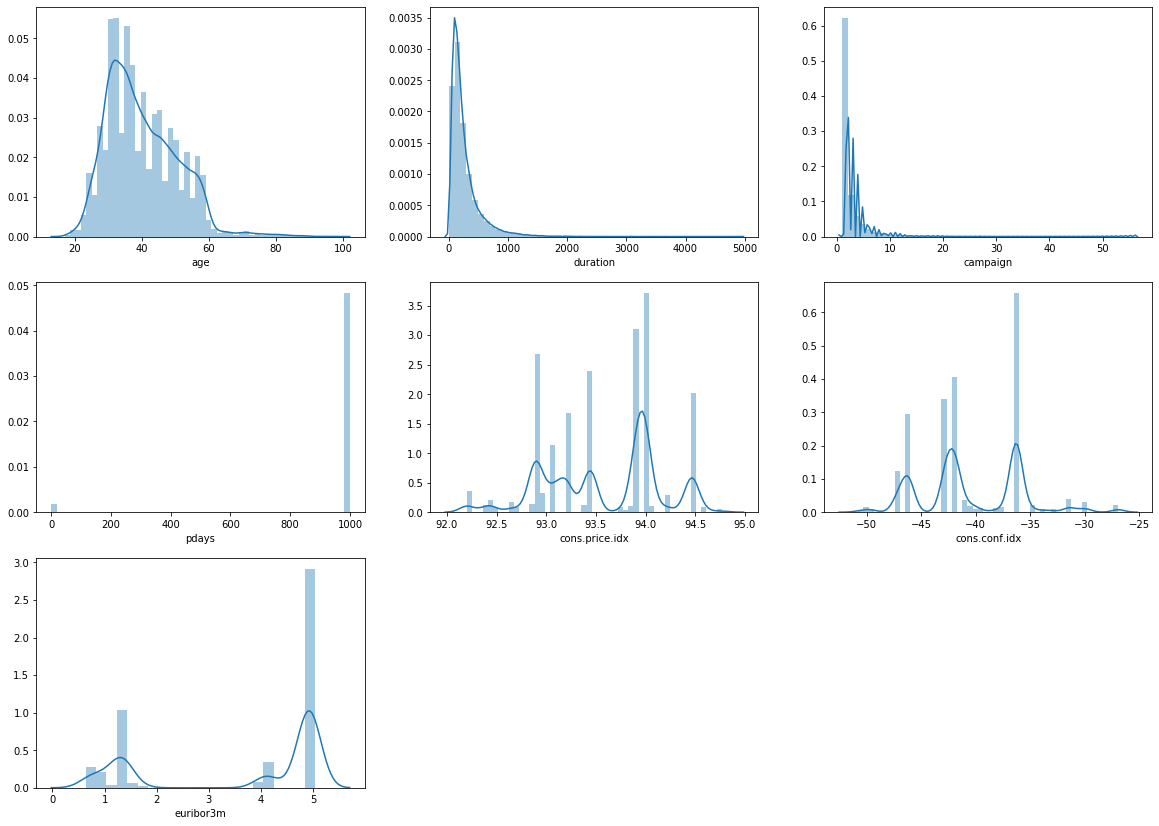

In [15]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Based on the above graph we can understand that banks are not keen on contacting older population though the relative frequency of opening a term deposit is higher above the age of 60 years.

The number of times a customer was contacted during the campaign is plotted below. Calling a customer more the 10 times for  single marketing campaigns seems like a marketing harassment and those values have been considered as outliers and can be removed from the data.

The value 999 shows the customer has never been contacted recently.


It seems age is distributed normally
 compaign are heavely skewed towards left and seems to be have some outliers.

### Find Outliers in numerical features

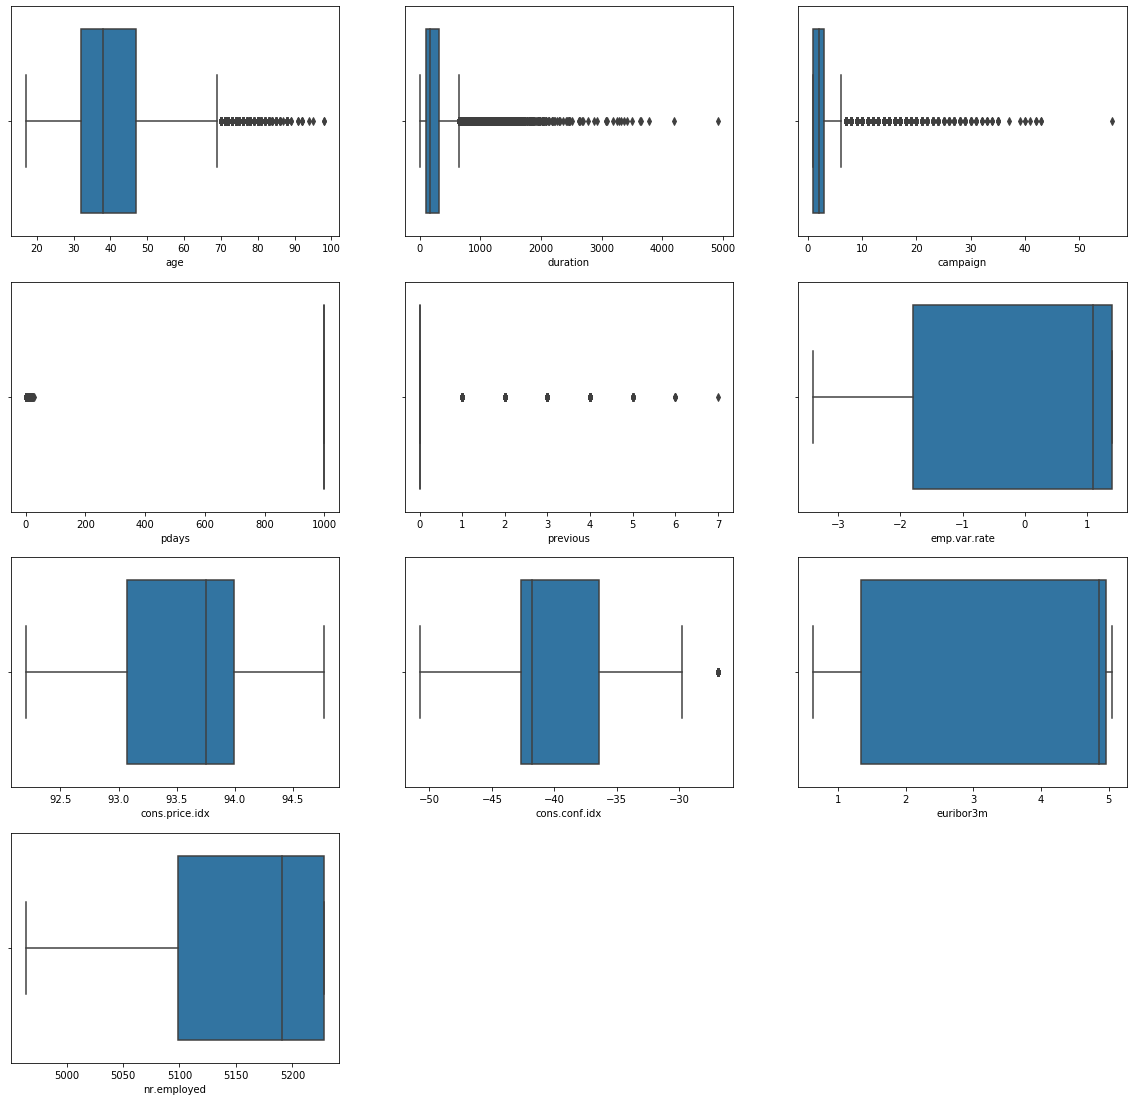

In [16]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Age, duration, compaign, pdays and previous has some outliers

### Correlation Plot between numerical variables

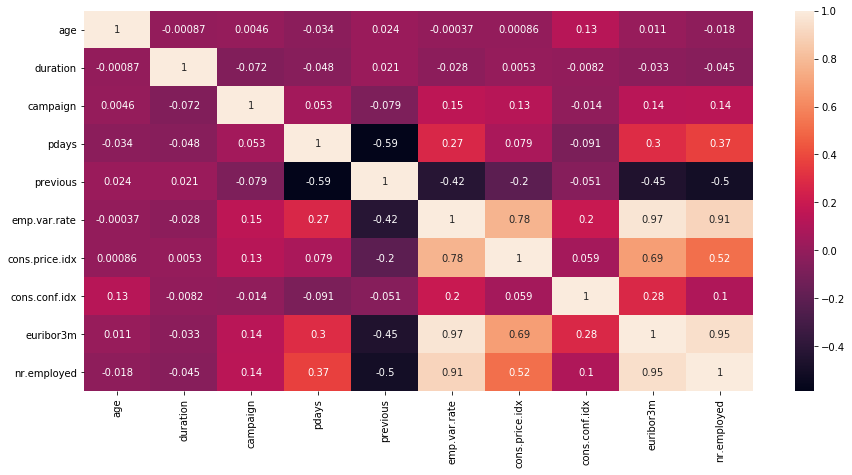

In [17]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

It seems Previous Variable has correlation with other Variables

Considering the outputs of the exploratory analysis we have selected 16 variables out of 20 independent variables for building a prediction model.

#### 16 Independent Variables: 
1. age 
2. job 
3. marital
4. education
5. contact
6. month
7. day_of_week
8. duration
9. campaign
10. pdays
11. previous
12. poutcome
13. cons.price.idx
14. cons.conf.idx
15. euribor3m
16. nr.employed y

#### Dependent Varaible:
1. y

In [18]:
# Converting Dependent variable from Yes/No to 1,0.
df.y.replace(('yes', 'no'), (1, 0), inplace=True)

# Dropping Unnecessary Columns
df1=df.drop(columns=['default','housing','loan','emp.var.rate'],axis=1)
df1

,age,job,marital,education,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,1
41184,46,bluecollar,married,professional.course,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,1


In [19]:
df1.columns 

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')